In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np 
import cv2
from collections import Counter
from skimage.color import rgb2lab,deltaE_cie76
import os
%matplotlib inline

image type <class 'numpy.ndarray'>
image shape (3456, 4608, 3)


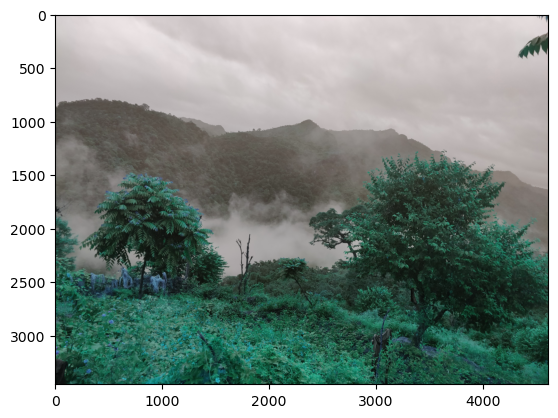

In [4]:
image =cv2.imread("sample_image.jpg")
print("image type {}".format(type(image)))
print("image shape {}".format(image.shape))
plt.imshow(image)

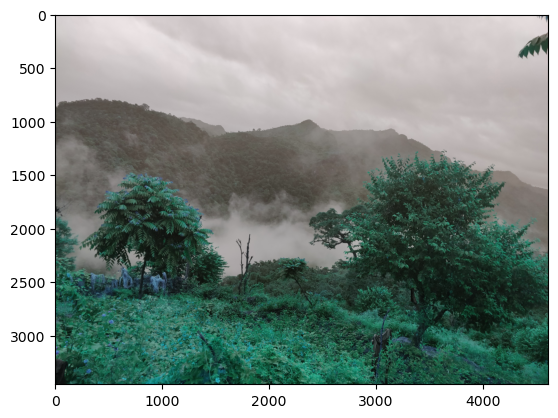

In [9]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [67]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2]))                           

In [68]:
def get_img(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

In [69]:
def get_colors(image,numberOfColors=3,showChart=True):
    newImage = cv2.resize(image,(600,400),interpolation=cv2.INTER_AREA)
    height  = newImage.shape[0]
    width = newImage.shape[1]
    newImage = newImage.reshape(width*height,3)
    model = KMeans(n_clusters=numberOfColors)
    labels = model.fit_predict(newImage)
    count = Counter(labels)
    centeroids = model.cluster_centers_
    #print(centeroids)
    #print(count.keys())
    #print(count)
    orderedColors = [centeroids[i] for i in count.keys()]
    #print(orderedColors)
    hex_colors = [RGB2HEX(orderedColors[i]) for i in count.keys()]
    rgb_colors = [orderedColors[i] for i in count.keys()]
    if showChart:
        plt.figure(figsize =(8,6))
        plt.pie(count.values(),labels=hex_colors,colors=hex_colors)
    return rgb_colors

[array([193.75832979, 193.8827691 , 200.81501246]),
 array([52.25753526, 64.89606949, 31.06412429]),
 array([101.27840225, 110.30824169,  90.14193348])]

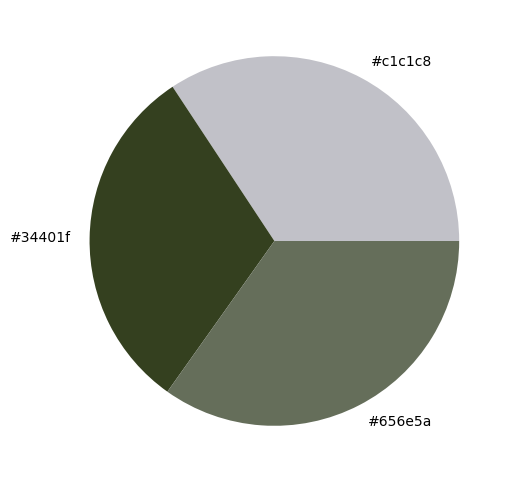

In [70]:
get_colors(get_img("sample_image.jpg"))

In [71]:
#search images using colors

In [72]:
IMAGE_PATH = "images"
COLORS = {
    "GREEN":[0,128,0],
    "BLUE":[0,0,128],
    "YELLOW":[255,255,0]
}
images = []
for file in os.listdir(IMAGE_PATH):
    if not file.startswith("."):
        images.append(get_img(os.path.join(IMAGE_PATH,file)))
        

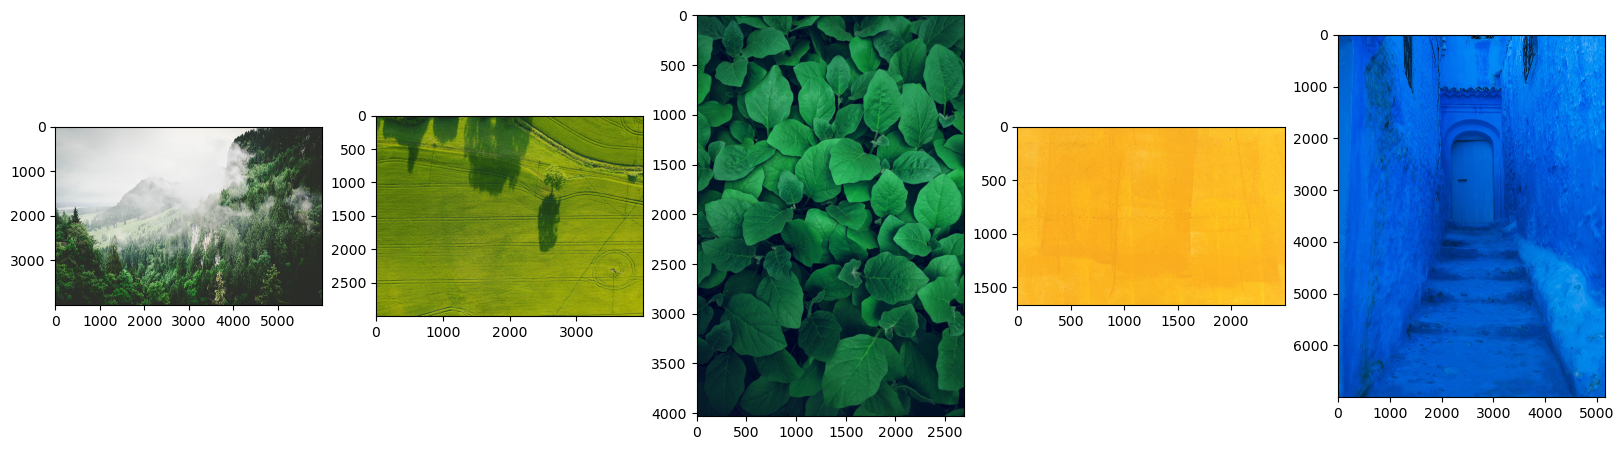

In [73]:
plt.figure(figsize =(20,10))
for i in range(len(images)):
    plt.subplot(1,len(images),i+1)
    plt.imshow(images[i])

In [79]:
def match_image_by_color(image,color,threshold = 60,numberOfColors=10):
    img_colors = get_colors(image,numberOfColors,False)
    selectedColor = rgb2lab(np.uint8(np.asarray([[color]])))
    select_img = False
    for i in range(numberOfColors):
        currColor = rgb2lab(np.uint8(np.asarray([[img_colors[i]]])))
        diff = deltaE_cie76(selectedColor,currColor)
        if(diff<threshold):
            select_img = True
    return select_img

In [80]:
def show_selected_imgs(images,color,threshold,colors_to_match):
    idx = 1
    for i in range(len(images)):
        sel = match_image_by_color(images[i],color,threshold,colors_to_match)
        if(sel):
            plt.subplot(1,5,idx)
            plt.imshow(images[i])
            idx+=1

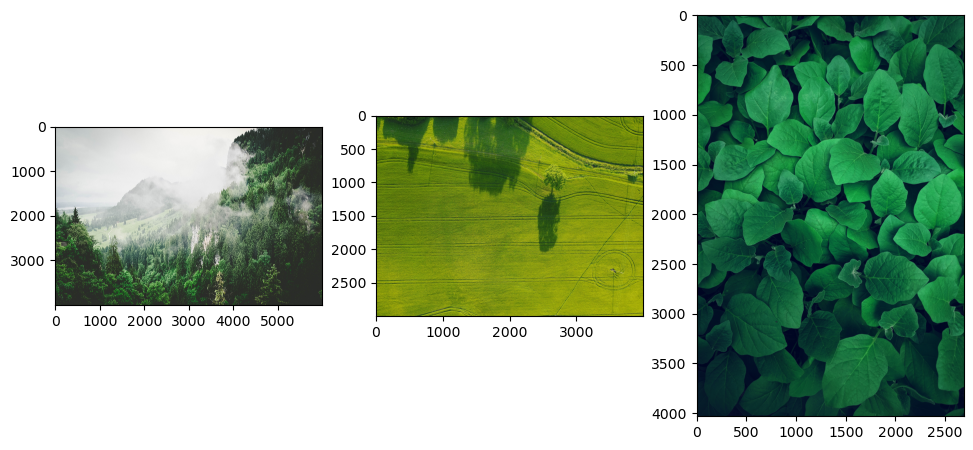

In [81]:
plt.figure(figsize=(20,10))
selected_color=COLORS["GREEN"]
show_selected_imgs(images,selected_color,60,5)

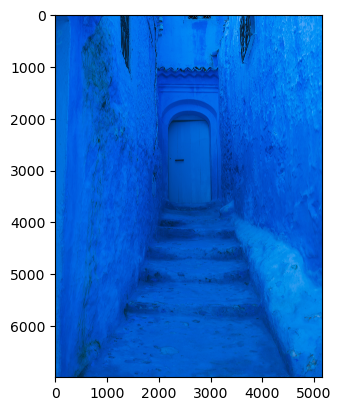

In [82]:
plt.figure(figsize=(20,10))
selected_color=COLORS["BLUE"]
show_selected_imgs(images,selected_color,60,5)

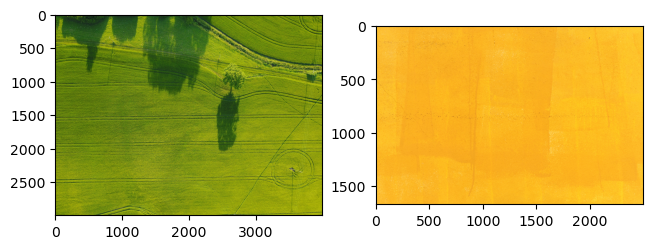

In [83]:
plt.figure(figsize=(20,10))
selected_color=COLORS["YELLOW"]
show_selected_imgs(images,selected_color,60,5)